In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def norm_err(y_test, p_test):
    """
    Calculates the normalized error between a true and predicted reference interval as proposed in CA-125 paper submitted to Sci. Reports
    
    Arguments:
        y_test:   true RI
        p_test:   predicted RI
        
    Returns:
        normalized error
    """
    return np.mean([np.abs(i-j) for i,j in zip([-1, 1], (p_test-y_test.mean())/y_test.std())])/2



In [2]:
test_data_path = '../../data/data_v2/'
prediction_path = './refineR_predictions/'


In [3]:
# load test data
test_x = pickle.load(open(test_data_path+'x_test.pkl', 'rb'))
test_y = pickle.load(open(test_data_path+'y_test.pkl', 'rb'))
# load test file list
test_files = sorted(os.listdir(prediction_path))


In [4]:
test_p = []
for i in test_files:
    test_p.append(pd.read_csv(prediction_path+i).PointEst.values)
    

In [5]:
test_indices = [int(i.split('.')[0]) for i in test_files]
test_y = [test_y[i][[1, -2]] for i in test_indices]
test_x = [np.array(test_x[i]) for i in test_indices]
test_p = [i+min(j) for i,j in zip(test_p, test_x)]

test_p = np.array(test_p)
test_y = np.array(test_y)
test_files = np.array(test_files)


In [6]:
test_p.shape


(1000, 2)

In [7]:
test_y.shape


(1000, 2)

In [8]:
errors = [norm_err(i, j) for i,j in zip(test_y, test_p)]
errors = np.array(errors)


In [9]:
np.where(np.isnan(errors))


(array([], dtype=int64),)

In [10]:
idx = ~np.isnan(errors)
test_files = test_files[idx]
test_y = test_y[idx]
test_p = test_p[idx]
test_x = [test_x[i] for i in np.where(~np.isnan(errors))[0]]
errors = errors[idx]
del idx


In [11]:
np.mean(errors)


0.1365689150793959

In [12]:
np.median(errors)


0.0731276569413113

In [13]:
error_threshold = 0.1
len(np.where(errors<=error_threshold)[0])/len(errors)


0.58

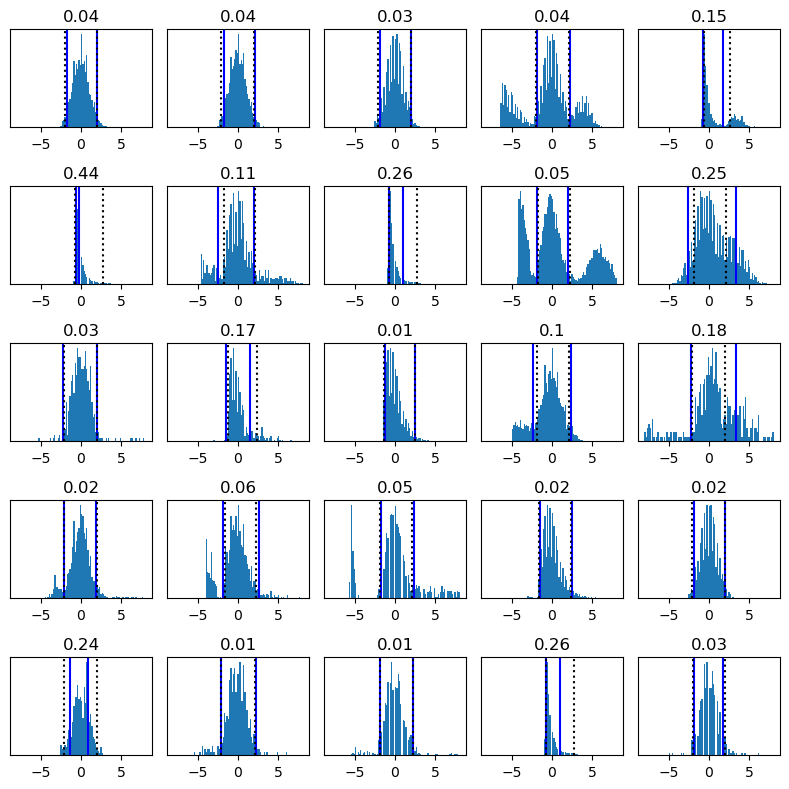

In [21]:
nr = 5
nc = 5
idx = np.random.choice(len(errors), nr*nc)
# idx = np.random.choice(np.where(errors>0.20)[0], nr*nc)
np.save('./example_idx.npy', idx)
plt.figure(figsize=(8, 8))
for c,i in enumerate(idx):
    plt.subplot(nr, nc, c+1)
    plt.hist(test_x[i], np.linspace(-8, 8, 101), density=True);
    for j in test_p[i]:
        plt.axvline(j, c='b')
    for j in test_y[i]:
        plt.axvline(j, c='k', linestyle=':')
    plt.yticks([])
    plt.title(round(errors[i], 2))
plt.tight_layout()


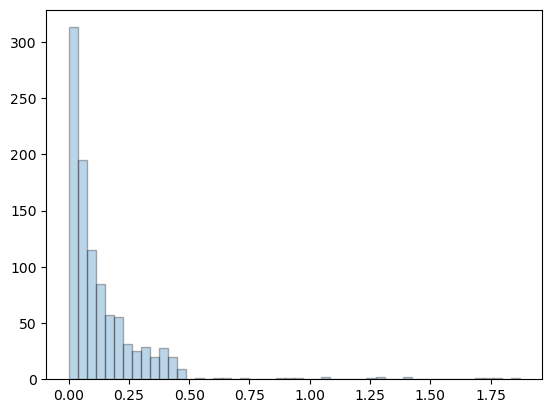

In [18]:
plt.hist(errors, 50, edgecolor='k', alpha=0.3);
